In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import simpson

In [2]:
def bayesian_update(N, M, a=1, b=1):
    f = np.linspace(0, 1, 1000)

    # normalized prior distribution
    prior = f ** (a - 1) * (1 - f) ** (b - 1)
    prior /= simpson(prior, f)

    likelihood = (f**M) * ((1 - f) ** (N - M)) * math.comb(N, M)

    # normalized post distribution
    posterior = prior * likelihood
    posterior /= simpson(posterior, f)

    return f, prior, posterior

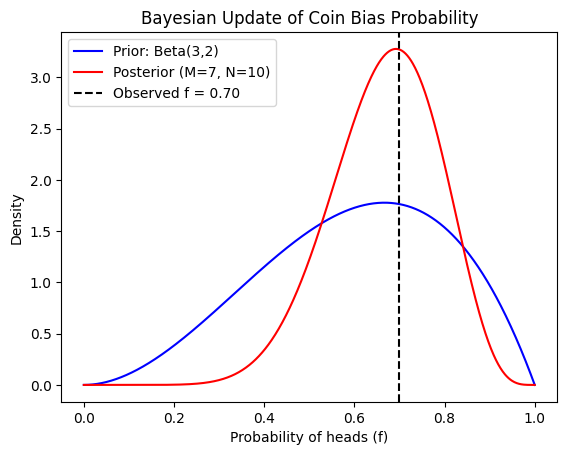

In [3]:
N, M = 10, 7
a, b = 3, 2

f, prior, posterior = bayesian_update(N, M, a, b)

plt.plot(f, prior, "b-", label=f"Prior: Beta({a},{b})")
plt.plot(f, posterior, "r-", label=f"Posterior (M={M}, N={N})")
plt.axvline(M / N, color="k", linestyle="--", label=f"Observed f = {M/N:.2f}")
plt.title("Bayesian Update of Coin Bias Probability")
plt.xlabel("Probability of heads (f)")
plt.ylabel("Density")
plt.legend()
plt.show()